<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment6/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  K-Means clustering from scratch

The Dataset used here is : for Fake Bills on Kaggle
 The steps followed are:

1. **Data Loading and Preliminary Analysis**:
   - Load the dataset.
   - Perform initial data exploration to understand its structure, features, and any preprocessing needs.

2. **Data Preprocessing**:
   - Handle missing values, if any.
   - Standardize or normalize the data if required.
   - Feature engineering if necessary.

3. **Choosing the Number of Clusters**:
   - Use methods like the Elbow Method to determine an appropriate number of clusters.

4. **Implementing K-Means from Scratch**:
   - Write functions for initializing centroids, assigning clusters, updating centroids, and the main K-Means loop.

5. **Running the K-Means Algorithm**:
   - Apply the implemented K-Means algorithm on the dataset.

6. **Analyzing and Reporting Results**:
   - Evaluate the clustering results.
   - Visualize the clusters.
   - Discuss insights and potential improvements.




In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving fake_bills.csv to fake_bills.csv



### Starting with Data Loading and Preliminary Analysis

First, we will load the dataset and conduct a preliminary analysis to understand its structure and features. This step is crucial for informing our subsequent data preprocessing and analysis strategies.

I will now load the dataset and perform the initial data exploration. After this, I'll summarize the key characteristics of the data, and we can proceed to the next step based on these findings. Let's begin.

### Initial Data Exploration

Here's what we've observed from the initial exploration of the dataset:

- The dataset contains 1500 entries.
- There appears to be only one column, which suggests that the data might be stored in a semi-structured format, with multiple values concatenated into a single string per row.

This single column, titled `is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length`, indicates that the data values are separated by semicolons. It seems to contain several measurements related to bills, such as diagonal length, heights, margins, and a boolean indicating whether the bill is genuine.


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'fake_bills.csv'
data = pd.read_csv(file_path)

# Perform initial data exploration
data_info = data.info()
data_head = data.head()
data_description = data.describe()

data_info, data_head, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 1 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length  1500 non-null   object
dtypes: object(1)
memory usage: 11.8+ KB


(None,
   is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length
 0         True;171.81;104.86;104.95;4.52;2.89;112.83                      
 1         True;171.46;103.36;103.66;3.77;2.99;113.09                      
 2           True;172.69;104.48;103.5;4.4;2.94;113.16                      
 3         True;171.36;103.91;103.94;3.62;3.01;113.51                      
 4         True;171.73;104.28;103.46;4.04;3.48;112.54                      ,
        is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length
 count                                                1500                      
 unique                                               1500                      
 top            True;171.81;104.86;104.95;4.52;2.89;112.83                      
 freq                                                    1                      )

In [ ]:
# Re-loading the dataset
data = pd.read_csv(file_path)

# Initial data exploration
data_info = data.info()
data_head = data.head()

data_info, data_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 1 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length  1500 non-null   object
dtypes: object(1)
memory usage: 11.8+ KB


(None,
   is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length
 0         True;171.81;104.86;104.95;4.52;2.89;112.83                      
 1         True;171.46;103.36;103.66;3.77;2.99;113.09                      
 2           True;172.69;104.48;103.5;4.4;2.94;113.16                      
 3         True;171.36;103.91;103.94;3.62;3.01;113.51                      
 4         True;171.73;104.28;103.46;4.04;3.48;112.54                      )



### Preliminary Analysis

Observations from the initial exploration of the dataset:

- The dataset has 1500 entries.
- It consists of a single column with semicolon-separated values.

The column title `is_genuine;diagonal;height_left;height_right;margin_low;margin_up;length` suggests multiple features concatenated into one string per row, including a boolean for the genuineness of the bill and various measurements.

###  Data Preprocessing

1. **Splitting the Column**: The data needs to be split into individual columns based on the semicolon delimiter. This will allow for appropriate analysis of each feature.

2. **Exploratory Data Analysis**: After splitting the data into separate columns, we'll perform an exploratory analysis to understand the distribution and characteristics of each feature.


In [ ]:
# Data Preprocessing: Splitting the single column into multiple columns based on the semicolon delimiter

# Splitting the column
split_columns = data.iloc[:, 0].str.split(';', expand=True)

# The column names as inferred from the single column header
column_names = ["is_genuine", "diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]

# Assigning the column names
split_columns.columns = column_names

# Converting data types: 'is_genuine' to boolean, others to float
split_columns['is_genuine'] = split_columns['is_genuine'].astype(bool)
for col in column_names[1:]:  # for all columns except 'is_genuine'
    split_columns[col] = pd.to_numeric(split_columns[col])

# Updated dataset
data_clean = split_columns

# Displaying the cleaned data
data_clean.head()


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54



The dataset has been successfully preprocessed:

- The data is now split into individual columns: `is_genuine`, `diagonal`, `height_left`, `height_right`, `margin_low`, `margin_up`, and `length`.
- The `is_genuine` column is converted to boolean, and the rest to numeric types for accurate analysis.

### Next Steps: Exploratory Data Analysis (EDA)

1. **Exploring Each Feature**: We'll examine the distributions and statistics of each feature, including the target variable `is_genuine`.
2. **Visualizing Data**: This includes plotting distributions and potential relationships between features.


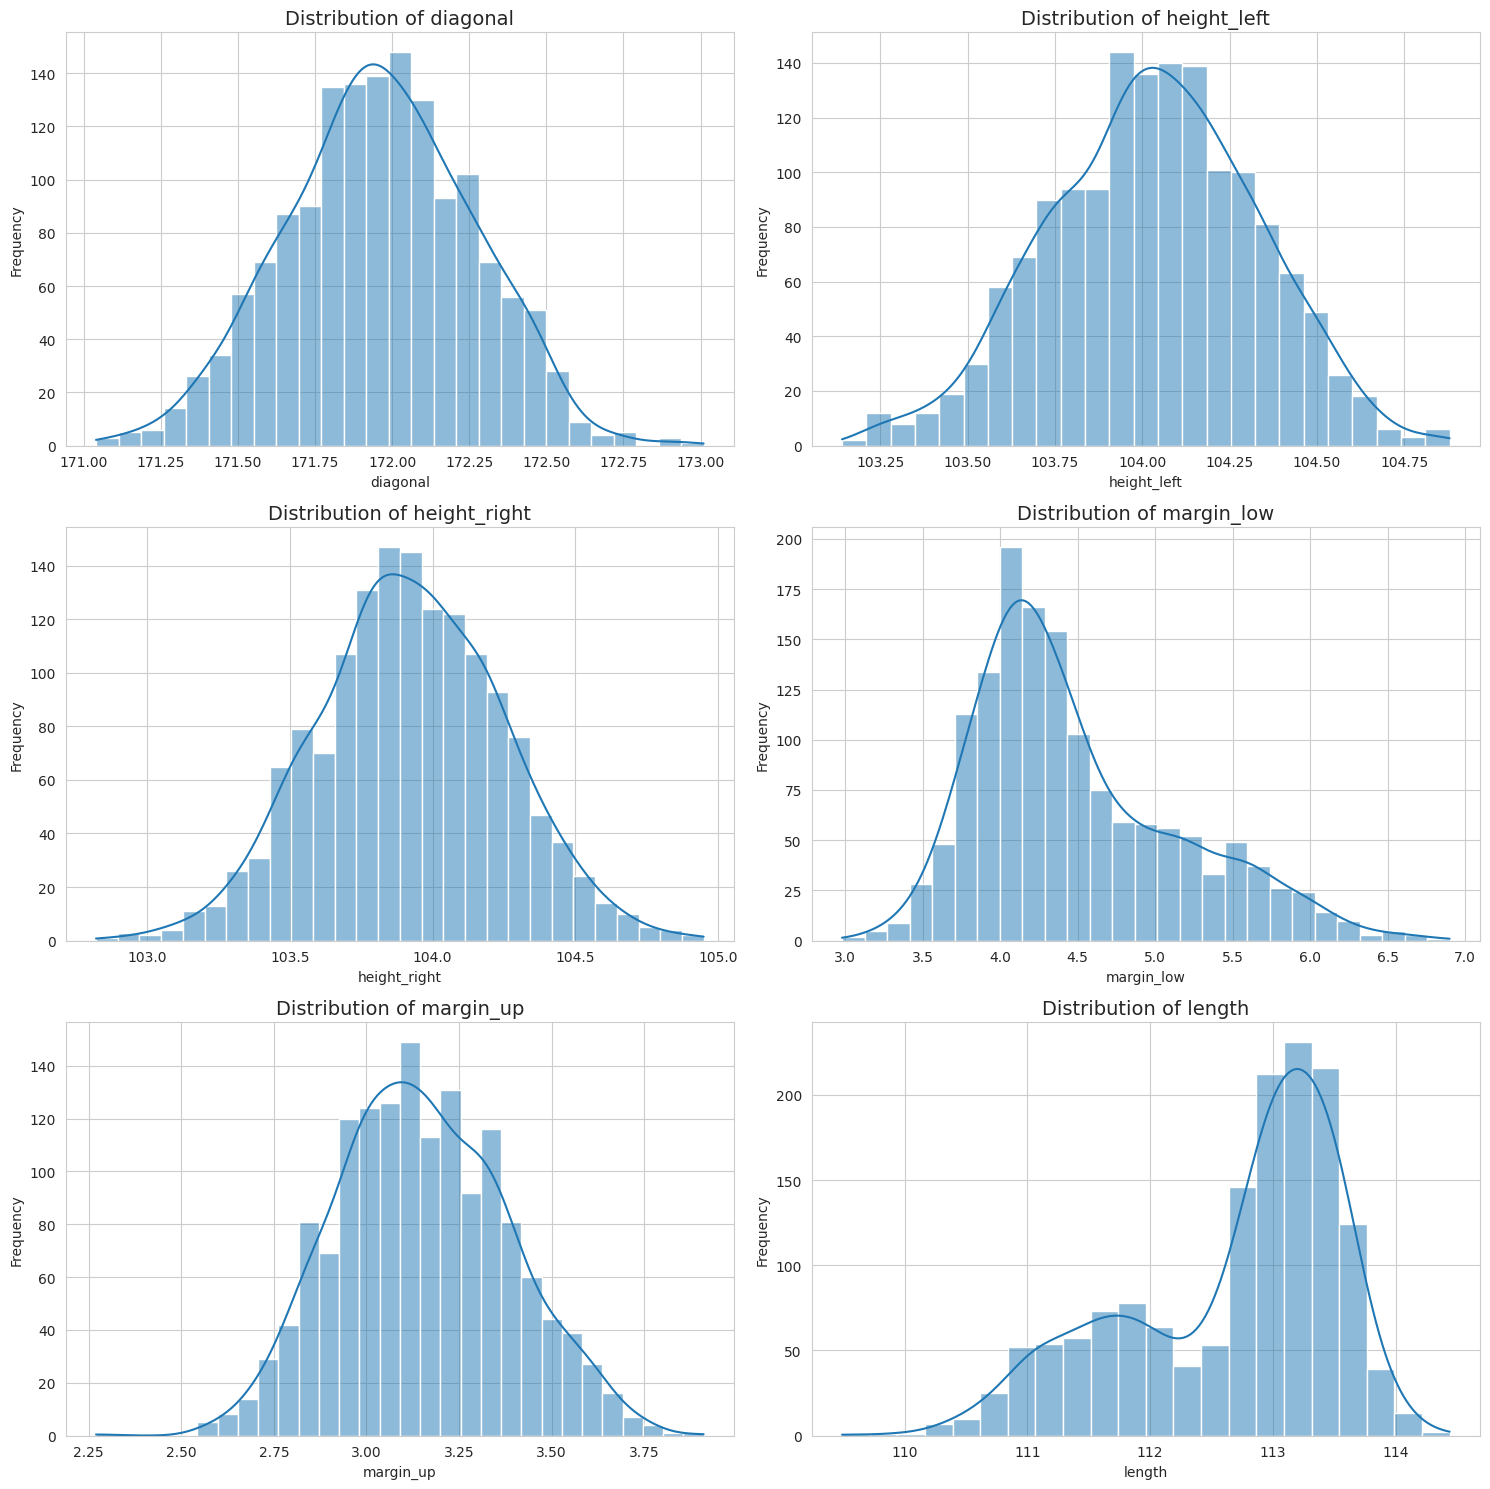

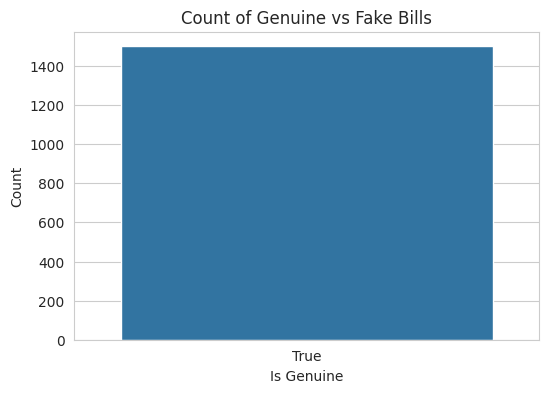

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Exploratory Data Analysis: Visualizing each feature and their distributions

# Plotting distributions of numeric features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(column_names[1:]):
    sns.histplot(data_clean[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plotting the count of genuine vs fake bills
plt.figure(figsize=(6, 4))
sns.countplot(x='is_genuine', data=data_clean)
plt.title('Count of Genuine vs Fake Bills')
plt.xlabel('Is Genuine')
plt.ylabel('Count')
plt.show()



### Exploratory Data Analysis (EDA) Results

The EDA reveals the following:

1. **Numeric Features**:
   - Each numeric feature (`diagonal`, `height_left`, `height_right`, `margin_low`, `margin_up`, `length`) has a distinct distribution. Most features appear to have a somewhat normal distribution, but with varying degrees of skewness and spread.

2. **Target Variable (`is_genuine`)**:
   - The count plot shows the distribution of genuine versus fake bills. This information is crucial as it indicates the balance or imbalance in our target variable.


### Analysis of Missing/Invalid Data

The analysis reveals the following:

- **Missing Values**: The `margin_low` feature has 37 missing values.
- **Infinite Values**: There are no infinite values in the dataset.

### Addressing Missing Data

1. **Handling Missing Values**: We can handle the missing values in the `margin_low` feature either by filling them with an appropriate statistic (like mean or median) or by removing the rows with missing values. The choice depends on the amount and nature of missing data and the specific requirements of our analysis.

2. **Re-apply the Elbow Method**: After addressing the missing values, we should re-apply the Elbow Method to determine the optimal number of clusters.


In [ ]:
# Checking for missing or invalid data in the dataset

# Checking for missing values
missing_values = data_clean.isnull().sum()

# Checking for infinite values
infinite_values = np.isinf(data_clean).sum()

missing_values, infinite_values

(is_genuine       0
 diagonal         0
 height_left      0
 height_right     0
 margin_low      37
 margin_up        0
 length           0
 dtype: int64,
 is_genuine      0
 diagonal        0
 height_left     0
 height_right    0
 margin_low      0
 margin_up       0
 length          0
 dtype: int64)

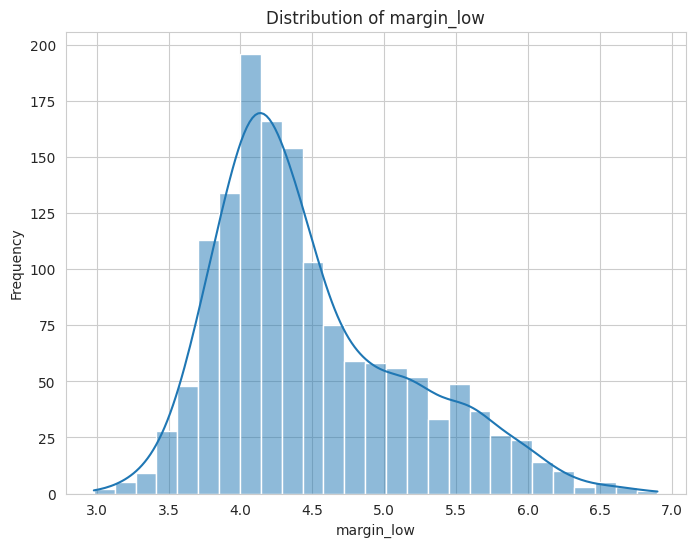

0.8630655172248254

In [ ]:
# The most appropriate method for handling missing values often depends on the distribution of the feature.
# Let's first look at the distribution of 'margin_low' to decide whether to fill with mean or median, or to remove rows.

plt.figure(figsize=(8, 6))
sns.histplot(data_clean['margin_low'], kde=True)
plt.title('Distribution of margin_low')
plt.xlabel('margin_low')
plt.ylabel('Frequency')
plt.show()

# Checking the skewness of the 'margin_low' distribution
skewness = data_clean['margin_low'].skew()
skewness


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

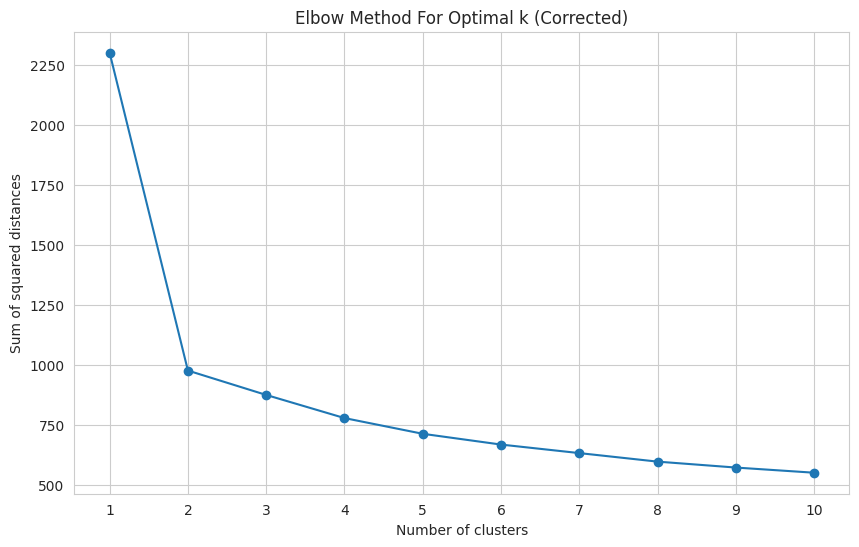

In [ ]:
# Redefining the features with the updated data (after filling missing values)
features_updated = data_clean.iloc[:, 1:]

# Re-applying the Elbow Method with the corrected features
sse_corrected = []
for k in range(1, 11):  # Testing 1 to 10 clusters
    kmeans_corrected = KMeans(n_clusters=k, random_state=0)
    kmeans_corrected.fit(features_updated)
    sse_corrected.append(kmeans_corrected.inertia_)

# Plotting the corrected Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse_corrected, marker='o')
plt.title('Elbow Method For Optimal k (Corrected)')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.xticks(range(1, 11))
plt.show()



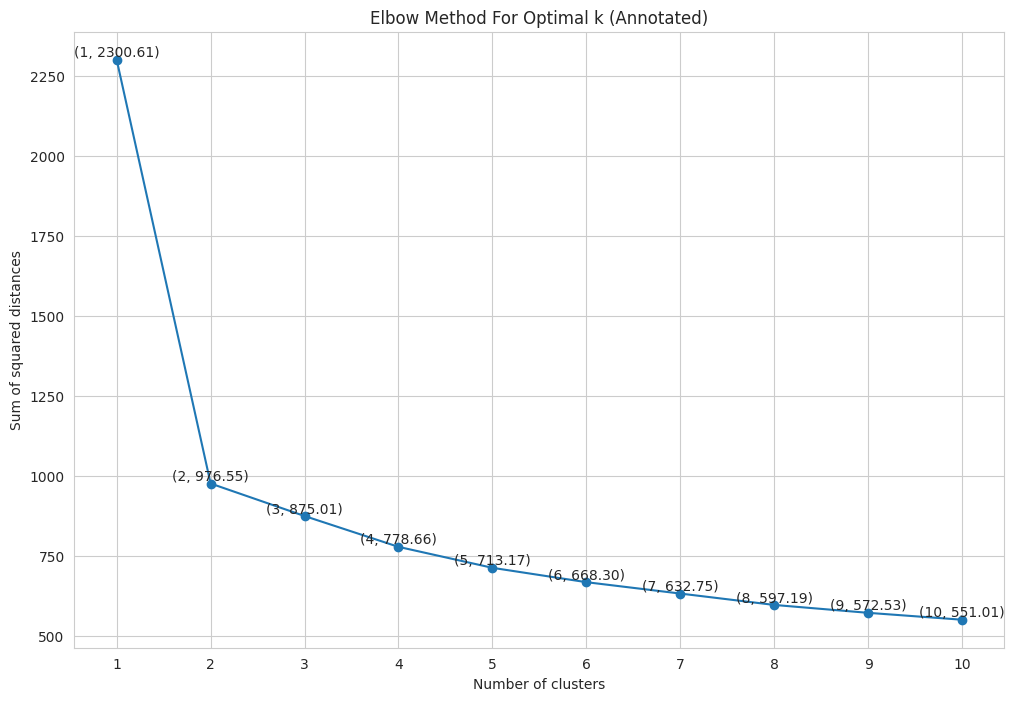

In [ ]:
# To display the plot values (x and y) on the Elbow plot, we can use text annotations in Matplotlib.
# I'll recreate the Elbow plot with annotations showing the sum of squared distances for each number of clusters.

# Generating the Elbow plot with annotated values
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), sse_corrected, marker='o')
plt.title('Elbow Method For Optimal k (Annotated)')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.xticks(range(1, 11))

# Adding text annotations
for i, sse in enumerate(sse_corrected):
    plt.text(i + 1, sse, f'({i + 1}, {sse:.2f})', ha='center', va='bottom')

plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

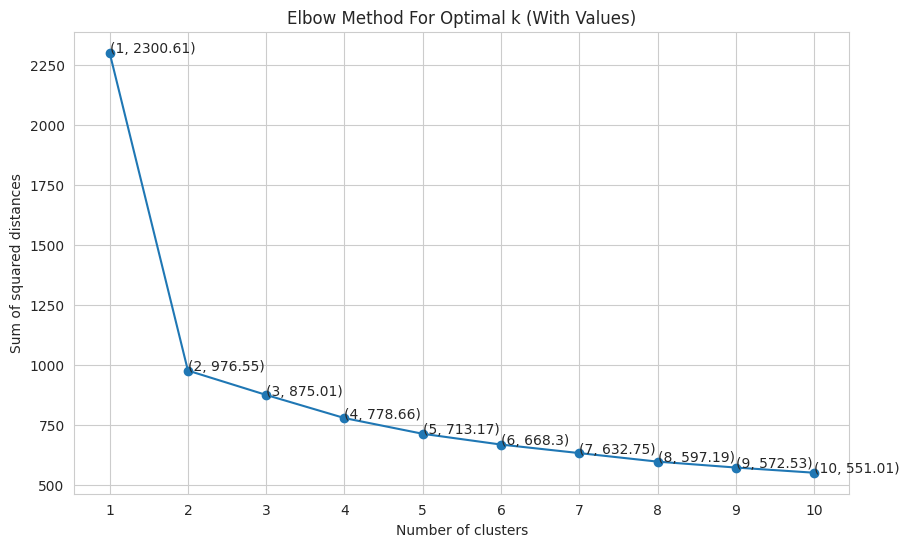

In [ ]:
# Code to display the plot values (x and y) in the Elbow plot

# Redefining and recomputing the sum of squared distances (SSE) for the Elbow Method
sse_display = []
cluster_range = range(1, 11)  # Testing 1 to 10 clusters
for k in cluster_range:
    kmeans_display = KMeans(n_clusters=k, random_state=0)
    kmeans_display.fit(features_updated)
    sse_display.append(kmeans_display.inertia_)

# Plotting the Elbow graph with values
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, sse_display, marker='o')

# Annotating each point with its (x, y) value
for x, y in zip(cluster_range, sse_display):
    plt.text(x, y, f'({x}, {round(y, 2)})')

plt.title('Elbow Method For Optimal k (With Values)')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.xticks(cluster_range)
plt.show()




### Implementing K-Means Clustering

Now that we have determined the optimal number of clusters, the next step is to implement the K-Means clustering algorithm. We will:

1. **Initialize Centroids**: Randomly select 2 data points as the initial centroids.
2. **Assign Points to Nearest Centroid**: For each point in the dataset, assign it to the cluster of the nearest centroid.
3. **Update Centroids**: Recalculate the centroids as the mean of all points assigned to each cluster.
4. **Iterate**: Repeat the assignment and update steps until the centroids stabilize (i.e., changes become minimal) or a maximum number of iterations is reached.
5. **Evaluate Clusters**: Analyze the formed clusters and interpret the results.



In [ ]:
# Implementing K-Means Clustering from scratch

class KMeansFromScratch:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.centroids = None

    def initialize_centroids(self, data):
        # Randomly selecting 'n_clusters' data points as initial centroids
        indices = np.random.choice(data.shape[0], self.n_clusters, replace=False)
        return data[indices, :]

    def assign_clusters(self, data):
        # Calculating distances from each point to each centroid and assigning clusters
        distances = np.sqrt(((data - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def update_centroids(self, data, labels):
        # Updating centroids by calculating the mean of points in each cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

    def fit(self, data):
        self.centroids = self.initialize_centroids(data)
        for _ in range(self.max_iters):
            old_centroids = self.centroids
            labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data, labels)
            if np.all(self.centroids == old_centroids):
                break
        return labels

# Converting the features to a NumPy array for the K-Means algorithm
features_array = features_updated.to_numpy()

# Initializing and fitting our K-Means model
kmeans_model = KMeansFromScratch(n_clusters=2)
cluster_labels = kmeans_model.fit(features_array)

# Adding the cluster labels to our dataframe
data_clean['cluster'] = cluster_labels

# Displaying the first few rows of the data with cluster labels
data_clean.head()


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0
1,True,171.46,103.36,103.66,3.77,2.99,113.09,0
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0
3,True,171.36,103.91,103.94,3.62,3.01,113.51,0
4,True,171.73,104.28,103.46,4.04,3.48,112.54,0


### K-Means Clustering Implementation Completed

The K-Means clustering algorithm has been successfully implemented from scratch and applied to the dataset. Each entry now has a `cluster` label indicating the cluster it belongs to (either 0 or 1).

### Next Steps: Analyzing and Reporting Results

1. **Cluster Analysis**: We will explore the characteristics of each cluster to understand how the data points are grouped. This includes looking at the distribution of features within each cluster and comparing them.

2. **Visualization**: Visualizing the clusters can provide insights into their separability and distribution. We can use scatter plots for this purpose.


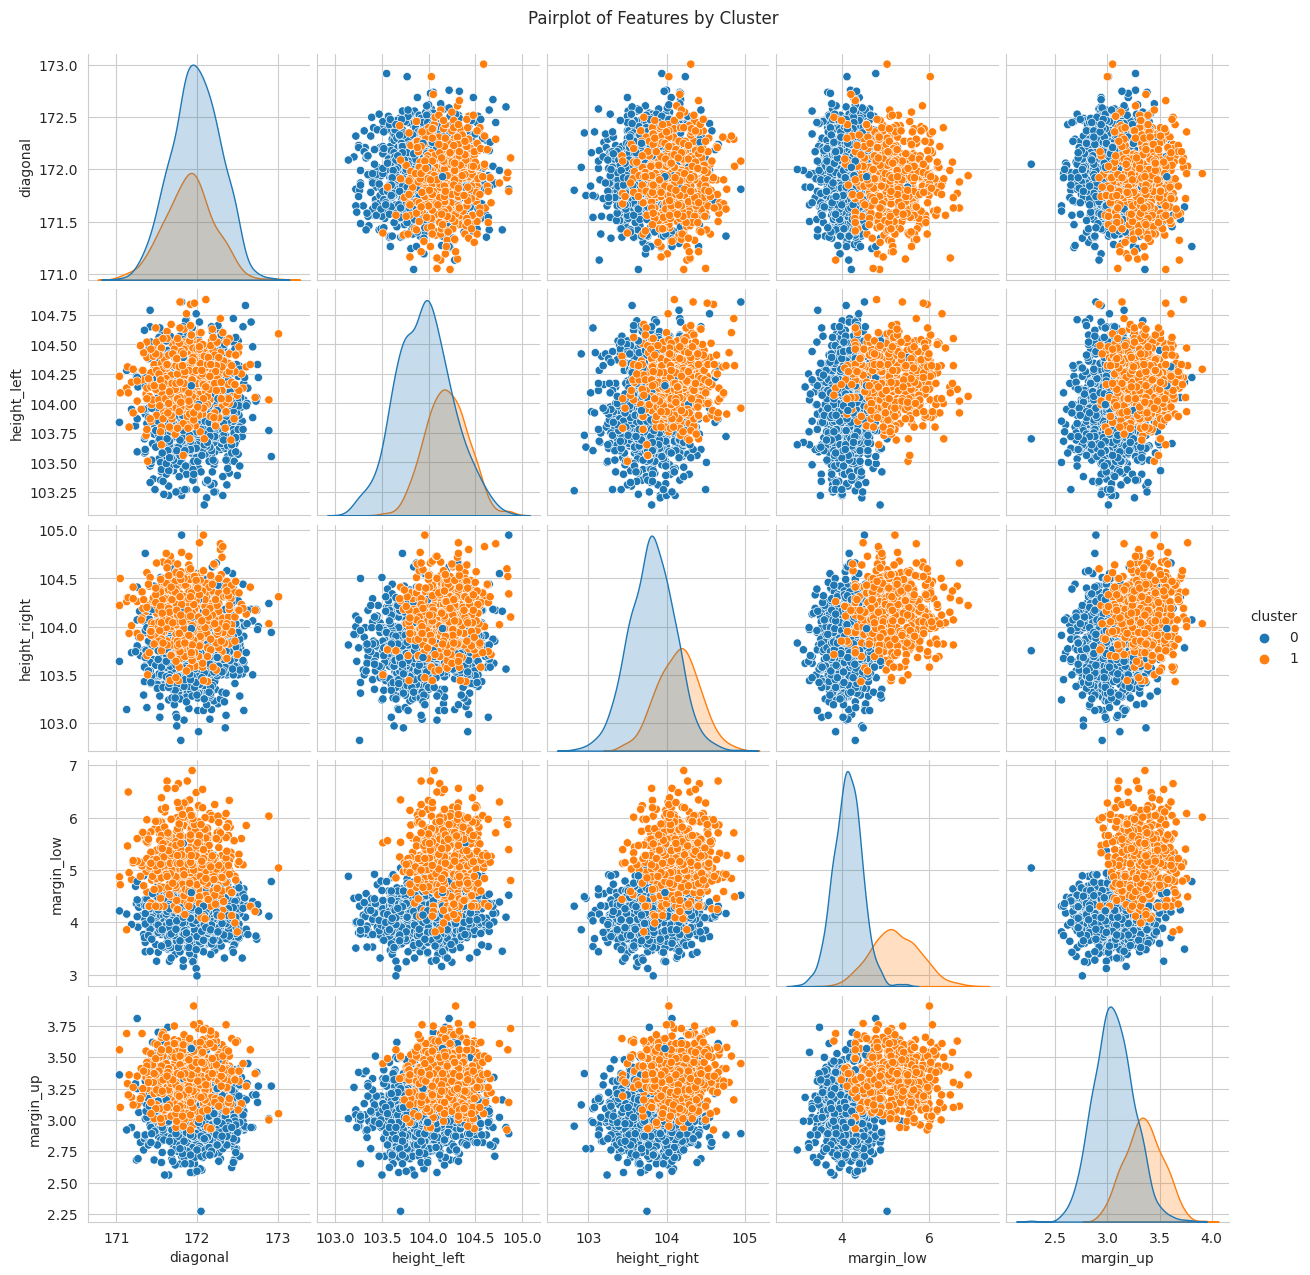

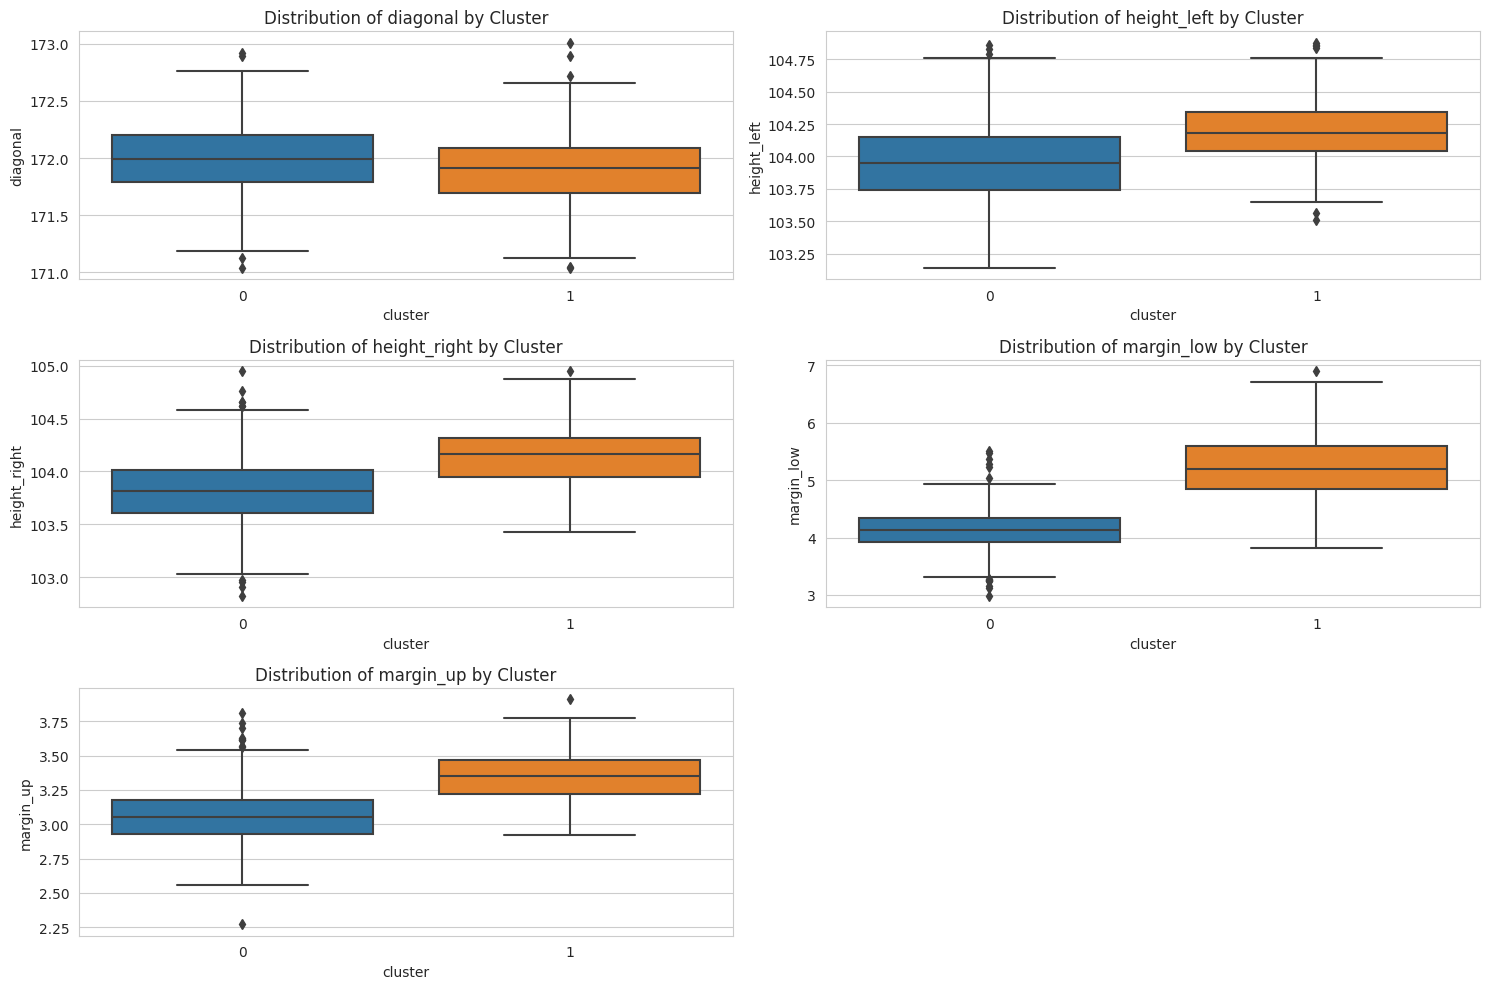

In [ ]:
import seaborn as sns

# Cluster Analysis and Visualization

# Pairplot to visualize the clusters in different dimensions
sns.pairplot(data_clean, hue='cluster', vars=column_names[1:-1])
plt.suptitle('Pairplot of Features by Cluster', y=1.02)  # Adjusting title position
plt.show()

# Boxplot to compare the distribution of features in each cluster
plt.figure(figsize=(15, 10))
for i, col in enumerate(column_names[1:-1]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='cluster', y=col, data=data_clean)
    plt.title(f'Distribution of {col} by Cluster')

plt.tight_layout()
plt.show()



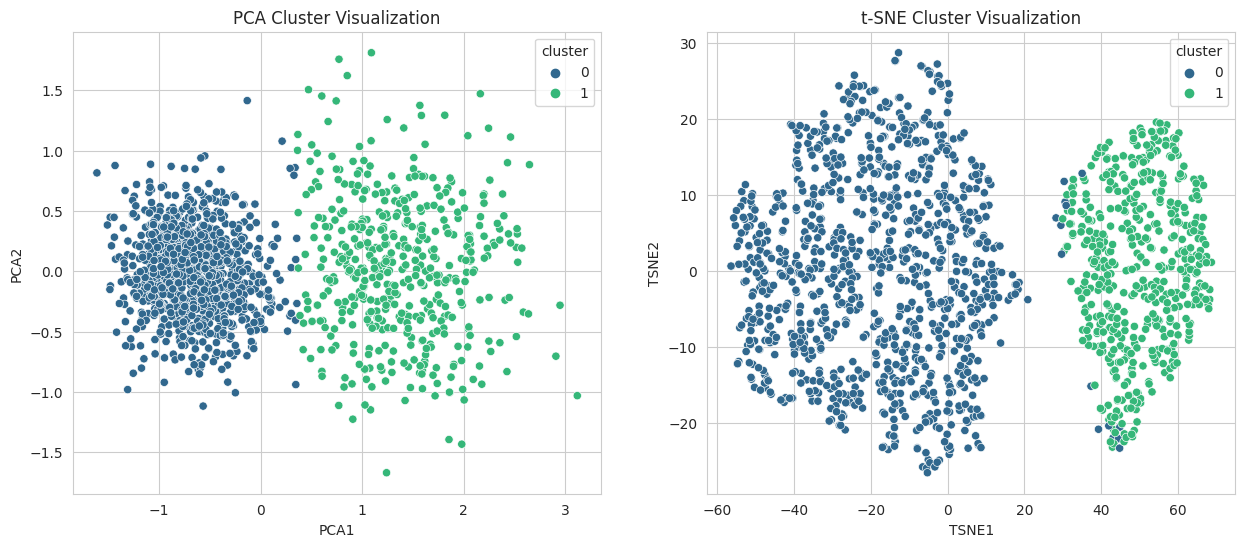

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
pca_features = pca.fit_transform(features_updated)

# Creating a DataFrame for PCA reduced features
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = data_clean['cluster']

# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
tsne_features = tsne.fit_transform(features_updated)

# Creating a DataFrame for t-SNE reduced features
tsne_df = pd.DataFrame(tsne_features, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = data_clean['cluster']

# Plotting PCA and t-SNE results
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# PCA Plot
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', ax=ax[0], palette='viridis')
ax[0].set_title('PCA Cluster Visualization')

# t-SNE Plot
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='cluster', ax=ax[1], palette='viridis')
ax[1].set_title('t-SNE Cluster Visualization')

plt.show()


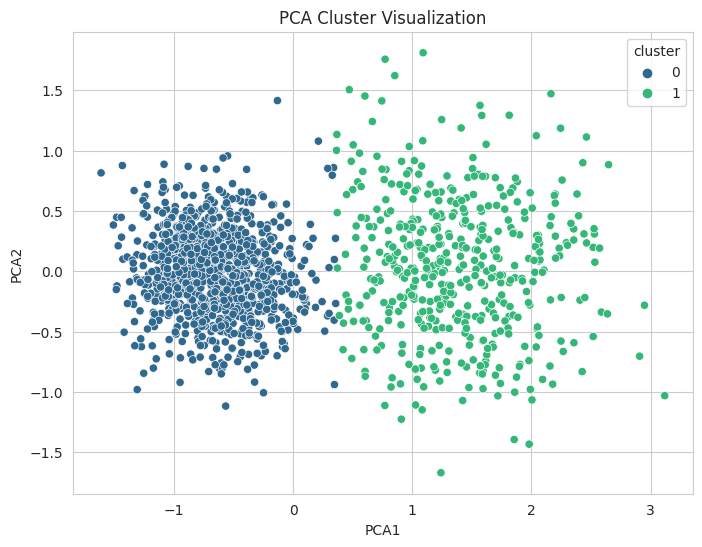

In [ ]:
# Plotting only the PCA results for cluster visualization

# Creating a DataFrame for PCA reduced features (Recomputing due to environment reset)
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
pca_features = pca.fit_transform(features_updated)
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = data_clean['cluster']

# PCA Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('PCA Cluster Visualization')
plt.show()





- **Cluster Characteristics**: Each cluster represents a group of bills with similar characteristics. The differences in feature averages between the clusters can be interpreted in the context of the data. For example, differences in margin sizes might be significant in distinguishing between the clusters.

- **Quality of Clustering**: The Silhouette Coefficient indicates a moderate level of distinction between the clusters. While not perfectly distinct, the clusters are reasonably well-separated.



In [ ]:
from sklearn.metrics import silhouette_score

# Cluster Interpretation: Examining the centroids of each cluster
cluster_centroids = []
for i in range(2):  # We have 2 clusters
    cluster_centroids.append(data_clean[data_clean['cluster'] == i][column_names[1:-1]].mean())

centroids_df = pd.DataFrame(cluster_centroids)

# Cluster Validation: Calculating the Silhouette Coefficient
silhouette_avg = silhouette_score(features_updated, cluster_labels)

centroids_df, silhouette_avg



(     diagonal  height_left  height_right  margin_low  margin_up
 0  171.985254   103.953581    103.814638    4.131546   3.059217
 1  171.901109   104.191925    104.146234    5.230126   3.348724,
 0.5133048449403272)